## PS3 Discussion: PO Framework in Experiments

# Average Treatment Effect and Potential Outcomes


## 1. Wellness Data, Treatment Effect, and Average Treatment Effect
### 1.1. Treatment Effect
Let's review yesterday's class. 
As a reminder, the Mean Difference of `po_control` and `po_treat` would be the 'ideal' treatment effect.


In [20]:
#RUN THIS CELL
library(testthat)
# Read in the data.
data <- read.csv('ps3_wellness_with_POs.csv', stringsAsFactors = F)
data 

name,participate,baseline,po_control,po_treat
Alan,0,5125.63130,3035.8135,3035.8135
Ellen,0,86.21538,114.8225,114.8225
Will,0,588.56689,634.4608,704.4608
Sue,0,535.53156,611.7972,611.7972
Andy,0,585.91687,128.5700,128.5700
Bas,0,170.43001,614.9316,614.9316
Milo,0,800.00385,301.5333,301.5333
Susan,0,0.00000,0.0000,0.0000
Anne,0,21.27154,117.0600,117.0600
Stephanie,0,0.00000,0.0000,0.0000


In [21]:
#this is the difference of means! 
mean(data$po_treat)-mean(data$po_control)

[1] 0.75

### 1.2 Average Treatment Effect
We will now create a simulated data that only has one of the potential outcomes.

For instance, we will ONLY KNOW Alan's control outcome, we will ONLY know Ellen's treat outcome, and so on.

When we say `Average Treatment Effect`, it usually refers to the difference in means of outcome in treatment and control groups for one sample. 

To simulate that on R, 

Let's create a random vector that consists of `TRUE` and `FALSE` using the `sample()` function. **You do not have to know how to generate something like this yourself**, so focus more on understanding what the code is doing, ex. what list or vector is the code creating etc.

In [24]:
set.seed(123)
treat <- sample(c(TRUE,FALSE),20,replace=TRUE) #this tells R to sample 20 items from a set called c(TRUE, FALSE), 
# and replace=TRUE means out of the 20 random draw, the same outcomes can reappear (otherwise we can't make a list of 20 elements!)

#Let's see what this vector looks like
treat

[1]  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE
[13] FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE

Let's input the `treat` vector in the `ifelse` function to create an `outcome` variable

In [18]:
outcome <- ifelse(treat==TRUE,data$po_treat,data$po_control)
outcome

[1] 3035.8135  114.8225  704.4608  611.7972  128.5700  614.9316  301.5333
 [8]    0.0000  117.0600    0.0000  310.1450    0.0000  112.8417  792.5024
[15]  192.2150  295.8675    0.0000  364.6858 1310.0459  205.1008

In [28]:

#each rows would have either of these two data points--po_control or po_treat.
sim1 <- data.frame(cbind(outcome,treat))
sim1

#again, this is how data in the real world looks like. It has only one of either potential outcomes under treatment or control.

outcome,treat
3035.8135,1
114.8225,0
704.4608,1
611.7972,0
128.5700,0
614.9316,1
301.5333,1
0.0000,1
117.0600,1
0.0000,0


In [29]:
sim1 <- data.frame(cbind(outcome,treat)) #bind the two lists into a dataframe
ATE <- mean(sim1$outcome|sim1$treat==TRUE)-mean(sim1$outcome|sim1$treat==FALSE) #and calculate the average treatment effect
ATE

[1] 0

Do the process again by re-creating a dataframe with only either PO_control or PO_treat, and re-calculate the ATE.

Team up with a partner (or get in your groups). One person should try running the below code multiple times, another person should record the outpus.

Do you see that the value sort of averages around 0.75?


In [60]:
#run this code multiple times and record the outputs you get
treat <- sample(c(TRUE,FALSE),20,replace=TRUE)
outcome <- ifelse(treat==TRUE,data$po_treat,data$po_control)
sim1 <- data.frame(cbind(outcome,treat))
ATE <- mean(sim1$outcome|sim1$treat==TRUE)-mean(sim1$outcome|sim1$treat==FALSE)
ATE

[1] -0.1

Again, this is how the 'true' or 'ideal' treatment effect and 'Average Treatment Effect' are different. The Average Treatment Effect approximates the true treatment effect.

## 2. Exercise: Field Experiment

We will now come back to the contact-theory field experiment you were shown in last week's section. This research is titled "Building social cohesion between Christians and Muslims through soccer in post-ISIS Iraq" by Salma Mousa. 

While we looked at the argument of the paper and main findings last week, we will look at the actual data and eventually replicate the research's findings. 

The study's research question, in a broad level, is **whether intergroup contact leads to better intergroup relations**, in accordance with Gordon Allport's Contact Theory. The researcher studied 28 amateur soccer teams in Northern Iraq whose members of the teams were all Christian, and invited them to accept three additional members to their team. To half of those teams, the researcher matched the teams with three Muslim members to the team. To the other half, the researcher provided three additional members who were Christian. 

If you were to conduct your own research, today's exercise would be the step you would need to take after your study has been conducted (ex. survey responses collected), data has been gathered, and cleaned.

We will be looking at the data of this research.

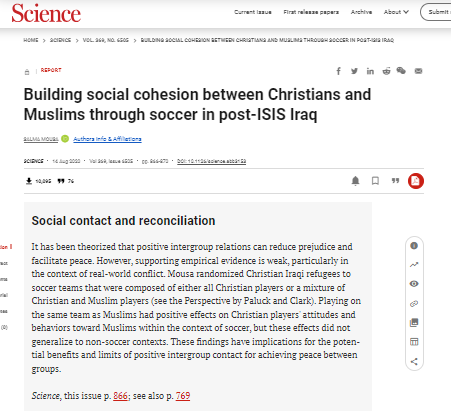


In [ ]:
# Let's load the data by running the following code chunk.
contact <- readRDS("Data/mousa/contact.RData")

head(contact) # let's look at top several rows



In [ ]:
# Some bonus commands useful for assessing the size of the data
dim(contact) # returns the 'dimensions' of the dataframe. for this one it has 232 rows and 57 columns! 
nrow(contact) # returns just the number of rows
length(contact) # the number of columns
ncol(contact) #also, the number of columns 
colnames(contact)

This dataset includes many variables, but let's focus on just a few for now:


In [ ]:
contact <- contact[,c("team","treated","train_t1","voted_muslim_extra","own_group_preference")]
contact <- na.omit(contact)
head(contact,30)

Research design: Researchers contacted existing amateur soccer teams in two northern Iraqi cities comprised of Christian members to partake in a community building program by admitting a few additional soccer players among the local displaced persons to their team. In this process, a total of 28 teams participated, with 14 teams receiving additional players who were Muslim, and the remaining 14 teams receiving additional playesr who were Christian. 

1. Independent Variable (cause / X):

`treated` = Whether individual was assigned to a mixed-member team
- 1 = Teams that have received three additional players who were Muslim
- 0 = Teams that have received three additional players who were Christian


.

2. Dependent Variables (effect / outcome variables / Y):

The following are behavioral measures--the researchers followed up with the participants 6 months after the study to assess whether the subjects' behavior varied between the treatment groups.

`train_t1` =  Training with Muslims 6 months post-intervention (train_t1)*
- 0 = yes
- 1 = no

`voted_muslim_extra` = Voted for Muslim added player to receive sportsmanship award

- 0 = voted for added Muslim player
- 1 = voted for added Christian player
- NA = did not vote

`own_group_preference` = Registered for a mixed team next season 
- 0 = prefer being on a team with one’s own community
- 1 = “would not mind” or “prefer” being on a mixed team next season


The paper can be found at: https://www.science.org/doi/10.1126/science.abb3153


### 2.2. Knowledge Check: 
#### 2.2.1. What's the causal argument here? 

(write your response below--to edit a code/text chunk, double click it) 

Remember, a causal argument has two structures, a cause and an effect, and there is a directionality. Cause leads to effect.

The argument of the article is: 

#### 2.2.2. What are the potential outcomes? What is the unit of analysis?

Potential outcomes:

Unit of analysis: 

### 1. Advanced
#### 1.4.1. How are experiments different from observational studies?

This study was an experiment. But how would the study have been different if there was no random assignment--i.e. the researcher simply looked for already-existing mixed teams and non-mixed teams? This means that team membership were not randomly assigned. How might the result differ? 
- How does an "observational" study look like, and how is it different from an experiment?
- What is a potential confounding factor (i.e. what would be an omitted variable)? 
- Suppose that there was no randomization. Would you see any possibility for reverse causality in the argument "more contact leads to better intergroup relations"?

#### 1.4.2. Imperfect randomization...

For most studies, we assume that randomization was carried out 'perfectly' by the computer, researcher, coin toss, etc.. but what if it turns out that even after randomly dividing two groups into treatment and control, you find out that there are confounding factors (ex. there are more female participants in the treatment group, and more male participants in the treatment group)?


### 1.5. Bonus: indexing a dataframe

The raw data often has many columns--more than you want and need! If you want to just look at a few variables, say, your treatment and outcome variables, you can do so by "indexing".

To index rows and columns, add brackets next to your dataframe object: `contact[]`, and input two vectors: `contact[row index, column index]` one for rows, the other for columns.

In [61]:
contact[c(1:10),c("treated","own_group_preference","voted_muslim_extra","train_t1")]

#can you tell which is the row index, and which is the column index?

ERROR: Error in eval(expr, envir, enclos): 객체 'contact'를 찾을 수 없습니다
